# COGS 108 - Final Project

# Overview

March Madness has become a popular event in the United States, much of it coming from predicting which teams will advance in the single elimination tournament. We tried to find defined variables that would help us more accurately predict the winner of the tournament matchups. By deriving a base score by the school’s history in the tournament, their success as a higher or lower seed, as well as the general outcomes of seeds we were able to create simulator that would make more accurate predictions.  

# Names

## Justin Thornburg
## Shanlin Hu
## Spencer Sheen
## Surya Kumaraguru

# Group Member IDs

### A13455725
### A15754205
### A14527095
### A14697291

# Research Question

Can we effectively use defined factors that will allow for us to more accurately predict an NCAA bracket.

# Introduction and Background

One of the most popular annual sporting events in the United States is the NCAA division 1 Men’s Basketball Tournament, or more commonly referred to as March Madness. Taking place at the conclusion of the season, schools are graded on their success throughout the season and if they are deemed as worthy, they are given a bid to enter the tournament. In total, 68 teams are represented in the tournament, divided into 4 regions, where teams are ranked as 1 to 16 seed, resulting in what is known as a “bracket.” March Madness is played as a single elimination tournament as teams advance with each win and losers being eliminated. Filling out the “bracket” has become a popular practice as millions of fans, both casual and avid watchers, attempt to predict the winner of each matchup and eventually who will the tournament. Throughout the history of “bracket filling,” there has never once been a perfect bracket, and the odds of predicting a perfect bracket is thought to be 1 in 9.2 quintillion (https://math.duke.edu/news/duke-math-professor-says-odds-perfect-bracket-are-one-24-trillion).

Reasons are abundant for why brackets cannot be filled correctly, ranging from the health of the team, travel, experience and many others. Because of the unpredictability of the matchups, gambling on brackets has become popular, especially in recent years, allowing for participants to earn money depending on how many matchups they correctly predicted. 

Previous studies done on predicting a perfect bracket have primarily focused on the teams results during the season. Deriving an algorithm that would take into account composite scores as well measuring a team’s ability to predict what team would come out on top in a potential matchup. While this study did slightly improve the accuracy of the bracket it still did not provide the jump in accuracy needed to be deemed successful (https://towardsdatascience.com/machine-learning-madness-predicting-every-ncaa-tournament-matchup-7d9ce7d5fc6d).

In our study we decided to focus more on the school's history as well as the history of the tournament itself, defining 3 main variables, the school’s success in the tournament, which would account for winning tradition, experience, and the overall strength of the school. How well a school does as the higher and lower seed, again taking into factor the school’s team strength, and predicting how the team would perform. Finally, the seed history, as the tournament is known for having many superstitious matchups, where one seed has normally performed over another, which takes into account the team's mindset going into a game. 


# Hypothesis

We believe we can use the school’s experience in the NCAA tournament, the historical outcomes of seed matchups, and how well a school has performed historically as a specific seed to more accurately predict an NCAA bracket.

In [1]:
#Imports

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO
import random
import math

# Datasets

## Historical Results Data Set

Unlike other studies whose research was based on information from the current season, we used historical information to help make out predicitons. The primary dataset we worked with provided us information regarding the historical outcomes of March Madness games ranging from 1985 - 2016, found here (https://data.world/sports/ncaa-mens-march-madness/workspace/file?filename=NCAA+Mens+March+Madness+Historical+Results.csv). 

Within this dataset, we were provided vast information including: year, teams, region, seeds, round, and also the score. The main variables that we focused on were the: year, team, round and seed as we felt that this would allow us to efficiently create a base score for each team that would incorporate their historical success in the tournament, and also include how well each school did as a higher or lower seed. 

The history of a school is very important as schools tend to match their historical greatness, this helps in our prediction as we can identify how schools will traditionally perform and thus more accurately predict their outcomes. The extended time span also negates any teams that have short lived outlier seasons. This data set also helps with a schools history regarding the seed they are, performing as a higher or lower seed. This allows for us to connect with the school’s psyche including the teams and fans as if a school has performed well as a lower seed, we can subsequently add more points that would cover the attitude they would have going into a game. All in all, this data set allows us to really understand how strong a school’s basketball program is and their mental state in different situations so that we can more accurately predict their matchups.  


## Seed History Data Sets

Continuing in our focus regarding the historical matchups and outcomes within the March Madness tournament, we wanted to see traditionally how seeds performed against each other, regardless of what team would be playing. We were able to find this dataset at (http://mcubed.net/ncaab/seeds.shtml). 

March Madness has a long and rich history, so many of the games have memorialized into basketball lore, including certain upsets that may occur. Because of this, it has become common practice for a team to be reminded of a certain matchup, and whether a certain seed always wins against another. This would affect many team, player and coach psyche and thus, the game itself, whether it be a team being more cautious because they have been traditionally upset, or a team confident knowing that most teams would win in this situation. We felt that this was an important variable to consider so we scraped through this page to find the dataset we were looking for, how a seed performs against the other 15 seeds. We use this in our study to add additional points in the matchups which would mimic a team’s psyche going into a game. 


# Data Cleaning / Pre- Processing

In [3]:
# Data Cleaning for the History of Seeds

url = 'http://mcubed.net/ncaab/seeds.shtml'

#Getting the website text
data = requests.get(url).text

#Parsing the website
#soup = BeautifulSoup(data, "html5lib")


soup = BeautifulSoup(data, "html.parser")
#Create an empty list
dflist = []

#If we look at the html, we don't want the tag b, but whats next to it
#StringIO(b.next.next), takes the correct text and makes it readable to pandas
for b in soup.findAll({"b"})[2:-1]:
    dflist.append(pd.read_csv(StringIO(b.next.next), sep = r'\s+', header = None))

dflist[0]

,0,1,2,3
0,vs.,#1,(23-23),50.0%
1,vs.,#2,(40-35),53.3%
2,vs.,#3,(25-15),62.5%
3,vs.,#4,(53-22),70.7%
4,vs.,#5,(45-9),83.3%
5,vs.,#6,(11-5),68.8%
6,vs.,#7,(6-1),85.7%
7,vs.,#8,(69-17),80.2%
8,vs.,#9,(72-8),90.0%
9,vs.,#10,(6-1),85.7%


In [4]:
#Created a new list, due to the melt we are going to do not been able to replace
#the dataframes in DFList
meltedDF = []

#The second item in the loop is the team number starting from 1
for df, teamnumber in zip(dflist, (np.arange(len(dflist))+1)):

    #Creating the team name
    name = "Team " + str(teamnumber)

    #Making the team name a column, with the values in df[0] and df[1] in our dataframes
    df[name] = df[0] + df[1]

    #Melting the dataframe to make the team name its own column
    meltedDF.append(df.melt(id_vars = [0, 1, 2, 3]))

# Concat all the melted DataFrames
allTeamStats = pd.concat(meltedDF)

# Final cleaning of our new single DataFrame
allTeamStats = allTeamStats.rename(columns = {0:name, 2:'Record', 3:'Win Percent', 'variable':'Team' , 'value': 'VS'})\
                           .reindex(['Team', 'VS', 'Record', 'Win Percent'], axis = 1)

allTeamStats

,Team,VS,Record,Win Percent
0,Team 1,vs.#1,(23-23),50.0%
1,Team 1,vs.#2,(40-35),53.3%
2,Team 1,vs.#3,(25-15),62.5%
3,Team 1,vs.#4,(53-22),70.7%
4,Team 1,vs.#5,(45-9),83.3%
5,Team 1,vs.#6,(11-5),68.8%
6,Team 1,vs.#7,(6-1),85.7%
7,Team 1,vs.#8,(69-17),80.2%
8,Team 1,vs.#9,(72-8),90.0%
9,Team 1,vs.#10,(6-1),85.7%




After parsing through the entire page, we can now see how successful historically each seed matchup is. This is a very important part in our study because this is where try to simulate the psychological aspect of playing the game. If a team has a higher chance of being “upset” regardless of being the higher seed, they may play more anxious and possibly not as well. Our simulator will take this into consideration by not giving them as high advantage that their seed might be given to the unaware public. 




In [5]:
allTeamStats[allTeamStats['Team'] == 'Team 1']

,Team,VS,Record,Win Percent
0,Team 1,vs.#1,(23-23),50.0%
1,Team 1,vs.#2,(40-35),53.3%
2,Team 1,vs.#3,(25-15),62.5%
3,Team 1,vs.#4,(53-22),70.7%
4,Team 1,vs.#5,(45-9),83.3%
5,Team 1,vs.#6,(11-5),68.8%
6,Team 1,vs.#7,(6-1),85.7%
7,Team 1,vs.#8,(69-17),80.2%
8,Team 1,vs.#9,(72-8),90.0%
9,Team 1,vs.#10,(6-1),85.7%


This is an example of how the one seed performs against the other 15 seeds. 

In [6]:
# Data Cleaning for Each School's History

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Must be in tournament 3 or 5 times to have school history rating
#import data
#laoding csv file into notebook as df
df = pd.read_csv('NCAA Mens March Madness Historical Results.csv')

Here we import the csv file into the notebook as a dataframe 

In [7]:
#select only round of 64, count the team once

#show all winner of the Round of 64
dfwR = df.loc[df['Round'] == 'Round of 64']
dfwR = pd.DataFrame(dfwR, columns = ['Winner'])

#show all loser of the Round of 64
dflR = df.loc[df['Round'] == 'Round of 64']
dflR = pd.DataFrame(dflR, columns = ['Loser'])

#sort by Winner
dfwS = dfwR.sort_values(by=['Winner'])

#sort by Loser
dflS = dflR.sort_values(by=['Loser'])

#show how many counts
dfwc = dfwS.Winner.value_counts()
dflc = dflS.Loser.value_counts()

#turn into dataFrame(Winner)
ndfW = pd.DataFrame({'Team': [], 'Count': []})
for i, y in dfwc.iteritems():
    ndfW = ndfW.append({'Team': i, 'Count': y}, ignore_index=True)

#turn into dataFrame(Loser)
ndfL = pd.DataFrame({'Team': [], 'Count': []})
for i, y in dflc.iteritems():
    ndfL = ndfL.append({'Team': i, 'Count': y}, ignore_index=True)

#merging the dataframes together 
cdf = pd.merge(ndfW, ndfL, on = 'Team', how = 'outer')
cdf = cdf.fillna(0.0)
cdf['Sum'] = cdf['Count_x'] + cdf['Count_y']
cdf = cdf.sort_values(by=['Sum'], ascending=False)
cdf

#Must be in tournament 3 times
#Check to make sure all teams counted are in the tournament at least 3 times
cdf3 = cdf[~(cdf['Sum'] < 3)] 

cdf3 = cdf3.reindex(cdf3.index)
cdf3.head()

,Team,Count_x,Count_y,Sum
0,Kansas,29.0,2.0,31.0
2,Duke,27.0,4.0,31.0
6,Arizona,19.0,11.0,30.0
1,North Carolina,28.0,1.0,29.0
3,Kentucky,25.0,2.0,27.0


The round of 64 is the first round of March Madness, so this is an important first step as we want to see all the teams that appeared in the tournament between 1985 and 2016. Our dataframe will display the team, the amount of times they won in the first round, the amount of times they lost, and most importantly the sum, which is the total number of appearances. 

In [8]:
#create dataFrame
cdf3T = pd.DataFrame(cdf3['Team'])
dfW = pd.DataFrame(df, columns = ['Date', 'Round','Winning Seed','Winner', 'Winning Score', 'Losing Seed','Loser', 'Losing Score'])
dfL = pd.DataFrame(df, columns = ['Date','Round', 'Losing Seed', 'Loser', 'Losing Score','Winning Seed', 'Winner', 'Winning Score'])

#only show the team that is >= 3 in the winner list
win = dfW['Winner'].isin(cdf3T['Team'])
dfW = dfW[win]

#only show the team that is >= 3 in the loser list
lose = dfL['Loser'].isin(cdf3T['Team'])
dfL = dfL[lose]

March Madness takes place every year and the schools that fight to get in are ultimately judged on their season for that year. Unfortunately there would be too many teams to analyze as some teams just make once and never again, which doesn't make them a suitable candidate for giving them a base score. Thus we felt that the only schools to consider should be those that have appeared a minimum of three times from 1985 to 2016 which would allow for us to give more accurate ratings for schools that appear continuously over the years. 

In [9]:
# School Rating System

#add another 'Point' column
#point base on round

#add point depend on winner
#For the rating system we decided to award points to teams that got a win in each round
#for winning in the Round of 64 each team gets 10 points
#for winning in the Round of 32 each team gets 20 points
#for winning in the Sweet Sixteen each team gets 30 points
#for winning in the Elite Eight each team gets 40 points
#for winning in the National Semifinals each team gets 50 points
#for winning the National Championship the team will get 60 points

points1 = []
for idx, row in dfW.iterrows():
    x = row['Round']
    if x == 'Round of 64':
        points1.append(10)
    elif x == 'Round of 32':
        points1.append(20)
    elif x == 'Sweet Sixteen':
        points1.append(30)
    elif x == 'Elite Eight':
        points1.append(40)
    elif x == 'National Semifinals':
        points1.append(50)
    elif x == 'National Championship':
        points1.append(60)
    else:
        points1.append(0)
        
dfW['Point'] = points1

#add point depend on loser
#Have to add points for losing team also because they made it to that round and still revieve points
#But that is the last round they recieve points from
points = []
for idx, row in dfL.iterrows():
    x = row['Round']
    if x == 'Round of 64':
        points.append(10)
    elif x == 'Round of 32':
        points.append(20)
    elif x == 'Sweet Sixteen':
        points.append(30)
    elif x == 'Elite Eight':
        points.append(40)
    elif x == 'National Semifinals':
        points.append(50)
    elif x == 'National Championship':
        points.append(60)
    else:
        points.append(0)
        
dfL['Point'] = points

This is where we derive the base score that we have for each of the teams in our dataframe. Depending on how far they make it each year in the tournament, we give them a certain point value, and thus we add up the points from each year to create a base score which we use later in our simulator to judge which team will progress, as base score represents schools strength. 

In [10]:
#create new dataframe df_ap for whole point system
#rerange index and add all years
df_ap = pd.DataFrame(columns=['College'])
df_ap['College'] = cdf3['Team']
df_index = pd.DataFrame({'index' :range(1, 206 ,1)})
string = 'Year_'
for i in range(1985, 2016):
    x = string + str(i)
    df_ap[x] = 0

In [11]:
#sum up all the point 

#sum up all the point depend on winner
i = 1
for idx, x in dfW['Winner'].iteritems():
    col = df_ap.columns[i]
    if dfW.Round[idx] == 'National Championship' and i < 31:
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfW.Point[idx]
        i = i + 1
    else:
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfW.Point[idx] 
        
#sum up all the point depend on loser        
i = 1
for idx, x in dfL['Loser'].iteritems():
    col = df_ap.columns[i]
    
    if dfL.Round[idx] == 'National Championship' and i < 31:

        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfL.Point[idx]
        i = i + 1
    else:
        #print('else')
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfL.Point[idx]

In [12]:
df_ap.index = pd.RangeIndex(len(df_ap.index))
df_ap['Point'] = 0.0


for idx, x in df_ap['College'].iteritems():
    y = 0.0
    for column in df_ap:
        if column == 'level_0' or column == 'index' or column == 'College':
            pass
        elif column == 'Point':
            df_ap.loc[idx, column] = y
        else:
            x = df_ap.loc[idx, column]
            y = (x + y) * 0.9

After we have our base score, we then use an algorithm that we developed that takes into hand what we call the “relevancy factor.” While the base score gives an idea of how strong a school is consistently, it is important to remember that a school may be great, but they were truly championship contenders in the past versus right now. For that, everytime we add the next year’s score the base score, we multiply it by .9, as this will allow for the base score to be impacted more by more recent year’s scores versus scores from the past. Therefore we maintain the “relevancy factor” as even though we look at the historical results, the most recent results matter the most. 

In [13]:
# School Seeding History
#This is a dataframe of the history of each school's seeding history
#count all the team win and lose with higher, lower, or even seed.
dff = pd.DataFrame(df_ap, columns = ['College','Point'])
dfW = dfW.rename(index=str, columns={"Losing Seed": "Losing_Seed", "Winning Seed": "Winning_Seed"})
dfL = dfL.rename(index=str, columns={"Losing Seed": "Losing_Seed", "Winning Seed": "Winning_Seed"})
dff['High_Seed_W'] = 0.0
dff['Low_Seed_W'] = 0.0
dff['Even_Seed_W'] = 0.0
dff['High_Seed_L'] = 0.0
dff['Low_Seed_L'] = 0.0
dff['Even_Seed_L'] = 0.0
for idx, x in dfW['Winning_Seed'].iteritems():
    
    if x < dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'High_Seed_W'] += 1    
    elif x > dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Low_Seed_W'] += 1
    elif x == dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Even_Seed_W'] += 1

for idx, x in dfL['Losing_Seed'].iteritems():
    
    if x < dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'High_Seed_L'] += 1    
    elif x > dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Low_Seed_L'] += 1
    elif x == dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Even_Seed_L'] += 1


This dataframe counts all the times a team lost, won, when encountering a higher or lower seed, which we will use in our school seed history score. 

In [14]:
#get the sum of high and low seed into sum column
dff['Sum_H'] = dff['High_Seed_W'] + dff['High_Seed_L']
dff['Sum_L'] = dff['Low_Seed_W'] + dff['Low_Seed_L']
dff['Sum_E'] = dff['Even_Seed_W'] + dff['Even_Seed_L']

#get the percentage of high, low, even seed
dff['High_Seed_W'] /=  dff['Sum_H']
dff['Low_Seed_W'] /=  dff['Sum_L']
dff['Even_Seed_W'] /=  dff['Sum_E']

#make the percentage into whole number
dff['High_Seed_W'] *=  100
dff['Low_Seed_W'] *=  100
dff['Even_Seed_W'] *=  100


In [15]:
#export the dataframe into csv file

df_final2 = pd.DataFrame(dff, columns = ['College','Point', 'High_Seed_W', 'Low_Seed_W', 'Even_Seed_W'])
df_final2.head()

,College,Point,High_Seed_W,Low_Seed_W,Even_Seed_W
0,Kansas,792.389680,79.268293,47.368421,60.0
1,Duke,842.004824,81.188119,45.454545,75.0
2,Arizona,541.023066,76.363636,40.000000,0.0
3,North Carolina,861.682669,84.269663,33.333333,50.0
4,Kentucky,882.300087,84.210526,47.368421,50.0


We can now see how schools that that have appeared at least 3 times in our timespan perform as a higher or lower seed. We will use this in our simulator to "simulate" the effect of mentality and psyche of teams.

In [16]:
df_ap5 = df_ap.head(5)
df_ap5

,College,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Point
0,Kansas,30,150,60,210,0,30,210,30,150,60,60,100,60,30,30,30,60,150,210,100,10,10,100,210,60,30,100,210,60,30,130,792.389680
1,Duke,30,210,60,150,150,210,210,210,30,210,0,10,30,100,210,60,210,60,60,150,60,60,10,30,60,210,60,10,100,10,270,842.004824
2,Arizona,10,10,10,150,60,30,60,10,10,150,10,60,210,100,10,30,210,60,100,10,100,30,10,10,60,0,100,0,60,100,110,541.023066
3,North Carolina,100,60,100,100,60,60,150,60,210,30,150,30,150,150,10,150,30,0,0,30,210,30,100,150,210,0,100,100,30,30,270,861.682669
4,Kentucky,60,100,10,60,0,0,0,100,150,30,100,210,210,210,100,30,60,60,100,30,100,30,30,10,0,100,150,210,0,210,180,882.300087


# Data Visualization

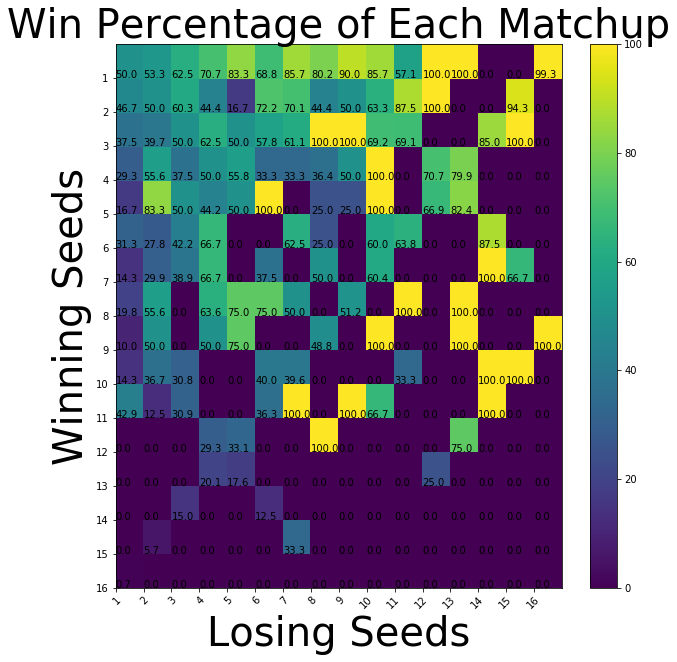

In [17]:
#Graph visualization Making a HeatMap for the Matchup History of Each Seed and Each Seeds winning percentage
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
y=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]
x=["16","15","14","13","12","11","10","9","8","7","6","5","4","3","2","1"]
winp = []
for i in x:
    lst = []
    for j in y:
        percent = allTeamStats.loc[(allTeamStats["Team"]== 'Team '+i) &\
                                    (allTeamStats["VS"]== "vs.#"+j)]['Win Percent'].iloc[0]
        percent = float(percent[:-1])
        lst.append(percent)
    winp.append(lst)
winpercentage= np.array([[]])

fig,ax=plt.subplots(figsize=(10,10))

# We want to show all ticks...
ax.set_xticks(np.arange(len(y)))
ax.set_yticks(np.arange(len(x)))

# ... and label them with the respective list entries
ax.set_xticklabels(y)
ax.set_yticklabels(x)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(x)):
    for j in range(len(y)):
        text = ax.text(j, i, winp[i][j],
                    color="black")

ax.set_title("Win Percentage of Each Matchup", fontsize= 40)
heatmap = plt.pcolor(winp)
plt.colorbar(heatmap)
ax.set_ylabel('Winning Seeds', fontsize= 40)
ax.set_xlabel('Losing Seeds', fontsize= 40)
plt.show()

This Data Visualization is important in seeing how each seed has done against one another. The y axis is labeled as winning seed due to the fact that one of these seeds has a better record than the other and so the y axis is labeled as the one with the more wins in each matchup. For example if you look at the 1 seed on the y axis and the 11 seed on the x axis you will see the corresponding box in the heatmap being 57% and since the y axis is the winning seed the 1 seed has won 57% of the time against the 11 seed.

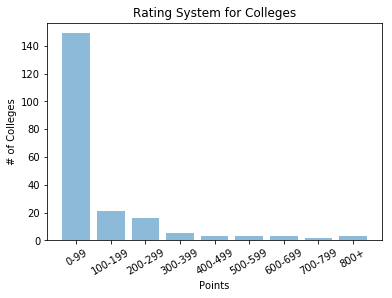

In [18]:
#Graph1: Displays the rating system for each College

x_pos = [0,0,0,0,0,0,0,0,0]
z = 0
for idx, row in df_final2.iterrows():
    x = row['Point']
    x_pos[int(str(x / 100)[:1])] += 1

        
objects = ('0-99', '100-199', '200-299', '300-399', '400-499','500-599', '600-699', '700-799', '800+')
y_pos = np.arange(len(objects))
plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.xticks(y_pos, objects, fontsize=10, rotation=30)
plt.ylabel('# of Colleges')
plt.xlabel('Points')
plt.title('Rating System for Colleges')
plt.show()

This graph displays the distribution of base scores within the data frame of teams that have appeared at least 3 times. We can see that there are an abundance of teams that have similar scores, specifically 0-99, which reveals to us why accurately predicting a bracket is extremely difficult. Many of the teams are evenly pitted against each other, and in our study, we hope to pick winners using the school seed history, as well as the general seed history. 


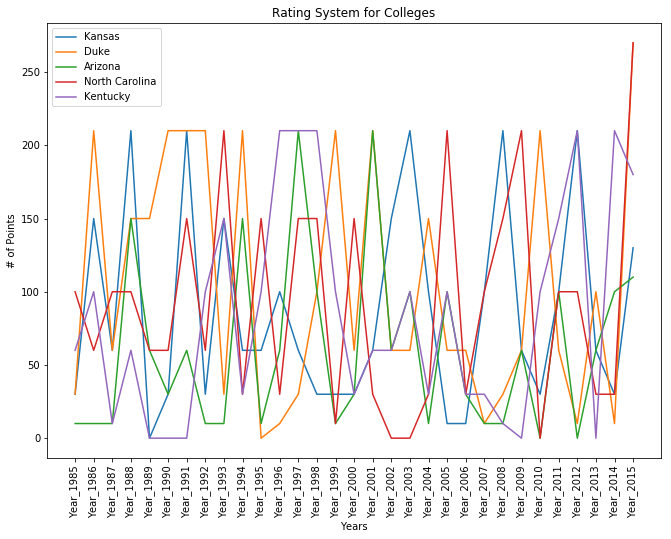

In [19]:
# Graph2: Displays the top 5 colleges by each year and how many points they earn each year

df_ap5=df_ap.head(5)
header = list(df_ap5)
header.pop(0)
header.pop(-1)
i = 0
while(i < len(df_ap5)):
    index = list(df_ap5.iloc[i])
    index.pop(0)
    index.pop(-1)
    plt.plot(header, index, label = df_ap5.College[i]) 
    i += 1

plt.xticks(fontsize=10, rotation=90)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.legend(loc='upper left')
plt.ylabel('# of Points')
plt.xlabel('Years')
plt.title('Rating System for Colleges')
plt.show()

This graph shows how the top 5 teams have performed year by year in the tournament, and while we have determined that high score relates into a good team. We can see that Arizona, while having a high base score, has not performed as well as the other schools in the tournament in recent years. This graph shows the importance of the “relevancy factor” as we can take into consideration while Arizona has traditionally been a consistent, high performing school, they should not be considered as high in our simulator because of their recent year performances.  


# Data Analysis and Results

In [20]:
# Compares the predicted teams vs the actual teams and calculates the total score based on what the prediction got right
# ex: bracket_score(south_32, south_32_actual, 1)
# Compares the south region round of 32 predictions vs the actual south region round of 32 and awards 1 point for each team
# predicted correctly
def bracket_score(predict, actual, value):
    total = 0
    for i in range(0, len(predict)):
        if predict[i] == actual[i]:
            total = total + value
            # Prints correct team normally
            print(predict[i], end=" ")
        else:
            # Prints incorrect team with a strikethrough
            print(strike(str(predict[i])), end=" ")
    print()
    return total

For our analysis, we ran our simulator against the actual results of the tournament, years 2018 and 2019. For every matchup we get right, we reward us with a point. 


In [21]:
#Prints a strikethrough through the given string
def strike(text):
    result = ''
    for c in text:
        result = result + c + '\u0336'
    return result

This strikes through the team that was eliminated in the simulated tournament 

In [22]:
# Calculates rating value of two schools competing against eachother in the tournament based on seed history, school history,
# and high/low seed history
#
# array: array that has the current teams
# n_array: array that has the teams advancing to the next round
# i: index to pull the matchup
# df: dataframe for school history and high/low seed history
# seed: dataframe for seed history
def calc_score(array, n_array, i, df, seed):
    # Extract team names and seed values, set base rating at 0
    team1 = array[i]
    team2 = array[i + 1]
    seed1 = team1[0]
    seed2 = team2[0]
    rating1 = 0
    rating2 = 0

    # Calculate school history and history as high or low seed and add to rating
    hist1 = df[df.College == team1[1]]
    if hist1.empty == False:
        # School history for team 1
        rating1 = rating1 + math.sqrt(hist1['Point'].sum())
        # High/low seed history for team 1
        if seed1 > seed2:
            rating1 = rating1 + float(hist1['High_Seed_W']) * 2
        elif seed2 > seed1:
            rating1 = rating1 + float(hist1['Low_Seed_W']) * 2
        else:
            rating1 = rating1 + float(hist1['Even_Seed_W']) * 2
    hist2 = df[df.College == team2[1]]
    if hist2.empty == False:
        # School history for team 2
        rating2 = rating2 + math.sqrt(hist2['Point'].sum())
        # High/low seed history for team 2
        if seed1 < seed2:
            rating2 = rating2 + float(hist2['High_Seed_W']) * 2
        elif seed2 < seed1:
            rating2 = rating2 + float(hist2['Low_Seed_W']) * 2
        else:
            rating2 = rating2 + float(hist2['Even_Seed_W']) * 2

    # Calculate seed history and add to rating
    seed_hist1 = seed[seed.Team == seed1]
    seed_hist1 = seed_hist1[seed_hist1.VS == seed2]
    rating1 = rating1 + float(seed_hist1["Win Percent"].sum()) * 10
    seed_hist2 = seed[seed.Team == seed2]
    seed_hist2 = seed_hist2[seed_hist2.VS == seed1]
    rating2 = rating2 + float(seed_hist2["Win Percent"].sum()) * 10

    # The higher rating is the winner. If both ratings are the same, the winner is chosen randomly
    if rating1 > rating2:
        n_array.append(team1)
    elif rating2 > rating1:
        n_array.append(team2)
    else:
        if random.randint(1, 3) == 1:
            n_array.append(team1)
        else:
            n_array.append(team2)

This is our simulator, as your can see we assign points to each school based on our defined variables. First we start each team with a score of 0, then considering the success of the school in tournament variable, we assign the base score points including the relevancy factor. We then add the win/loss percentage for the team depending on whether they are the higher or lower seed. As you can see we multiply it by 2 as we felt that it was important to consider how well a school has done historically as a lower or higher seed. Finally we add the seed history score, and we multiply it by 10. This is done because while our study is based on historical information, we still need to consider the present and so it we multiply the current seed win percentage by 10 so we consider the school’s current season. Finally we compare the ratings and if the team is higher, then it progresses in our simulator. 


In [23]:
# Create the full march madness bracket predictions and calculate score based on the actual bracket
# 
def calc_bracket(south, east, west, midwest, school_hist, allTeamStats,
                 south_32_actual, south_16_actual, south_8_actual, south_4_actual,
                 east_32_actual, east_16_actual, east_8_actual, east_4_actual,
                 west_32_actual, west_16_actual, west_8_actual, west_4_actual,
                 midwest_32_actual, midwest_16_actual, midwest_8_actual, midwest_4_actual,
                 national_championship_actual, champion_actual):
    south_32, south_16, south_8, south_4, east_32, east_16, east_8, east_4, \
    west_32, west_16, west_8, west_4, midwest_32, midwest_16, midwest_8, midwest_4 = ([] for i in range(16))

    # Predict round of 32 teams
    for i in range(0, len(south), 2):
        calc_score(south, south_32, i, school_hist, allTeamStats)
        calc_score(east, east_32, i, school_hist, allTeamStats)
        calc_score(west, west_32, i, school_hist, allTeamStats)
        calc_score(midwest, midwest_32, i, school_hist, allTeamStats)

    # Predict sweet 16 teams
    for i in range(0, len(south_32), 2):
        calc_score(south_32, south_16, i, school_hist, allTeamStats)
        calc_score(east_32, east_16, i, school_hist, allTeamStats)
        calc_score(west_32, west_16, i, school_hist, allTeamStats)
        calc_score(midwest_32, midwest_16, i, school_hist, allTeamStats)
    
    # Predict elite 8 teams
    for i in range(0, len(south_16), 2):
        calc_score(south_16, south_8, i, school_hist, allTeamStats)
        calc_score(east_16, east_8, i, school_hist, allTeamStats)
        calc_score(west_16, west_8, i, school_hist, allTeamStats)
        calc_score(midwest_16, midwest_8, i, school_hist, allTeamStats)

    # Predict final 4 teams
    for i in range(0, len(south_8), 2):
        calc_score(south_8, south_4, i, school_hist, allTeamStats)
        calc_score(east_8, east_4, i, school_hist, allTeamStats)
        calc_score(west_8, west_4, i, school_hist, allTeamStats)
        calc_score(midwest_8, midwest_4, i, school_hist, allTeamStats)

    final_four = [south_4[0], midwest_4[0], west_4[0], east_4[0]]
    national_championship = []
    champion = []
    # Predict teams competing national championship
    calc_score(final_four, national_championship, 0, school_hist, allTeamStats)
    calc_score(final_four, national_championship, 2, school_hist, allTeamStats)
    # Predict national championship winner
    calc_score(national_championship, champion, 0, school_hist, allTeamStats)

    # Calculate bracket score and print results
    print("Round of 32")
    r_32 = bracket_score(south_32, south_32_actual, 1) + bracket_score(east_32, east_32_actual, 1) + \
        bracket_score(west_32, west_32_actual, 1) + bracket_score(midwest_32, midwest_32_actual, 1)
    
    print("Sweet 16")
    r_16 = bracket_score(south_16, south_16_actual, 2) + bracket_score(east_16, east_16_actual, 2) + \
        bracket_score(west_16, west_16_actual, 2) + bracket_score(midwest_16, midwest_16_actual, 2)
    
    print("Elite 8")
    r_8 = bracket_score(south_8, south_8_actual, 4) + bracket_score(east_8, east_8_actual, 4) + \
        bracket_score(west_8, west_8_actual, 4) + bracket_score(midwest_8, midwest_8_actual, 4)
    
    print("Final 4")
    r_4 = bracket_score(south_4, south_4_actual, 8) + bracket_score(east_4, east_4_actual, 8) + \
        bracket_score(west_4, west_4_actual, 8) + bracket_score(midwest_4, midwest_4_actual, 8)
    
    print("National Championship")
    r_2 = bracket_score(national_championship, national_championship_actual, 16)
    
    print("National Champion")
    r_1 = bracket_score(champion, champion_actual, 32)
    
    # Calculate total score
    bracket_score_value =  r_32 + r_16 + r_8 + r_4 + r_2 + r_1
                          
    print(bracket_score_value)

Here we actually create the bracket and the format of the tournament.

In [24]:
# Get dataframes
allTeamStats = pd.read_csv('seed_history.csv')
school_hist = pd.read_csv("hwesw2.csv")
# Fill empty high/low matchups with 50% probability
school_hist = school_hist.fillna('50.0')

#Full 2018 March Madness Bracket
south_18 = [(1, "Virginia"), (16, "UMBC"), (8, "Creighton"), (9, "Kansas State"), (5, "Kentucky"), (12, "Davidson"),
    (4, "Arizona"), (13, "Buffalo"), (6, "Miami, Florida"), (11, "Loyola, Illinois"), (3, "Tennessee"), (14, "Wright State"),
    (7, "Nevada"), (10, "Texas"), (2, "Cincinnati"), (15, "Georgia State")]
east_18 = [(1, "Villanova"), (16, "Radford"), (8, "Virgina Tech"), (9, "Alabama"), (5, "West Virginia"), (12, "Murray State"),
    (4, "Wichita State"), (13, "Marshall"), (6, "Florida"), (11, "Saint Bonaventure"), (3, "Texas Tech"), (14, "SF Austin"),
    (7, "Arkansas"), (10, "Butler"), (2, "Purdue"), (15, "Cal State Fullerton")]
west_18 = [(1, "Xavier"), (16, "Texas Southern"), (8, "Missouri"), (9, "Florida State"), (5, "Ohio State"), (12, "South Dakota State"),
    (4, "Gonzaga"), (13, "UNC Greensboro"), (6, "Houston"), (11, "San Diego State"), (3, "Michigan"), (14, "Montana"),
    (7, "Texas A&M"), (10, "Providence"), (2, "North Carolina"), (15, "Lipscomb")]
midwest_18 = [(1, "Kansas"), (16, "Penn"), (8, "Seton Hall"), (9, "North Carolina State"), (5, "Clemson"), (12, "New Mexico State"),
    (4, "Auburn"), (13, "College of Charleston"), (6, "TCU"), (11, "Syracuse"), (3, "Michigan State"), (14, "Bucknell"),
    (7, "Rhode Island"), (10, "Oklahoma"), (2, "Duke"), (15, "Iona")]

south_32_actual_18 = [(16, "UMBC"), (9, "Kansas State"), (5, "Kentucky"), (13, "Buffalo"), (11, "Loyola, Illinois"), (3, "Tennessee"),
    (7, "Nevada"), (2, "Cincinnati")]
south_16_actual_18 = [(9, "Kansas State"), (5, "Kentucky"), (11, "Loyola, Illinois"), (7, "Nevada")]
south_8_actual_18 = [(9, "Kansas State"), (11, "Loyola, Illinois")]
south_4_actual_18 = [(11, "Loyola, Illinois")]

east_32_actual_18 = [(1, "Villanova"), (9, "Alabama"), (5, "West Virginia"), (13, "Marshall"), (6, "Florida"), (3, "Texas Tech"),
    (10, "Butler"), (2, "Purdue")]
east_16_actual_18 = [(1, "Villanova"), (5, "West Virginia"),(3, "Texas Tech"), (2, "Purdue")]
east_8_actual_18 = [(1, "Villanova"), (3, "Texas Tech")]
east_4_actual_18 = [(1, "Villanova")]

west_32_actual_18 = [(1, "Xavier"), (9, "Florida State"), (5, "Ohio State"), (4, "Gonzaga"), (6, "Houston"), (3, "Michigan"),
    (7, "Texas A&M"), (2, "North Carolina")]
west_16_actual_18 = [(9, "Florida State"), (4, "Gonzaga"), (3, "Michigan"), (7, "Texas A&M")]
west_8_actual_18 = [(9, "Florida State"), (3, "Michigan")]
west_4_actual_18 = [(3, "Michigan")]

midwest_32_actual_18 = [(1, "Kansas"), (8, "Seton Hall"), (5, "Clemson"), (4, "Auburn"), (11, "Syracuse"), (3, "Michigan State"),
    (7, "Rhode Island"), (2, "Duke")]
midwest_16_actual_18 = [(1, "Kansas"), (4, "Auburn"), (11, "Syracuse"), (2, "Duke")]
midwest_8_actual_18 = [(1, "Kansas"), (2, "Duke")]
midwest_4_actual_18 = [(1, "Kansas")]

national_championship_actual_18 = [(3, "Michigan"), (1, "Villanova")]
champion_actual_18 = [(1, "Villanova")]

#Full 2019 March Madness Bracket
south = [(1, "Virginia"), (16, "Gardner-Webb"), (8, "Mississippi"), (9, "Oklahoma"), (5, "Wisconsin"), (12, "Oregon"),
        (4, "Kansas State"), (13, "UC Irvine"), (6, "Villanova"), (11, "St. Mary's, California"), (3, "Purdue"),
        (14, "Old Dominion"), (7, "Cincinnati"), (10, "Iowa"), (2, "Tennessee"), (15, "Colgate")]
east = [(1, "Duke"), (16, "North Dakota State"), (8, "Virgina Commonwealth"), (9, "Central Florida"), (5, "Mississippi State"),
        (12, "Liberty"), (4, "Virginia Tech"), (13, "Saint Louis"), (6, "Maryland"), (11, "Belmont"), (3, "Louisiana State"),
        (14, "Yale"), (7, "Louisville"), (10, "Minnesota"), (2, "Michigan State"), (15, "Bradley")]
west = [(1, "Gonzaga"), (16, "Fairleigh D'son"), (8, "Syracuse"), (9, "Baylor"), (5, "Marquette"), (12, "Murray State"),
        (4, "Florida State"), (13, "Vermont"), (6, "Buffalo"), (11, "Arizona State"), (3, "Texas Tech"),
        (14, "Northern Kentucky"), (7, "Nevada"), (10, "Florida"), (2, "Michigan"), (15, "Montana")]
midwest = [(1, "North Carolina"), (16, "Iona"), (8, "Utah State"), (9, "Washington"), (5, "Auburn"),
            (12, "New Mexico State"), (4, "Kansas"), (13, "Northeastern"), (6, "Iowa State"), (11, "Ohio State"),
            (3, "Houston"), (14, "Georgia State"), (7, "Wofford"), (10, "Seton Hall"), (2, "Kentucky"), (15, "Abilene Christian")]

south_32_actual = [(1, "Virginia"), (9, "Oklahoma"), (12, "Oregon"), (13, "UC Irvine"), (6, "Villanova"), (3, "Purdue"),
        (10, "Iowa"), (2, "Tennessee")]
south_16_actual = [(1, "Virginia"), (12, "Oregon"), (3, "Purdue"), (2, "Tennessee")]
south_8_actual = [(1, "Virginia"), (3, "Purdue")]
south_4_actual = [(1, "Virginia")]

east_32_actual = [(1, "Duke"), (9, "Central Florida"), (12, "Liberty"), (4, "Virginia Tech"), (6, "Maryland"), (3, "Louisiana State"),
        (10, "Minnesota"), (2, "Michigan State")]
east_16_actual = [(1, "Duke"), (4, "Virginia Tech"), (3, "Louisiana State"), (2, "Michigan State")]
east_8_actual = [(1, "Duke"), (2, "Michigan State")]
east_4_actual = [(2, "Michigan State")]

west_32_actual = [(1, "Gonzaga"), (9, "Baylor"), (12, "Murray State"), (4, "Florida State"), (6, "Buffalo"), (3, "Texas Tech"),
        (10, "Florida"), (2, "Michigan")]
west_16_actual = [(1, "Gonzaga"), (4, "Florida State"), (3, "Texas Tech"), (2, "Michigan")]
west_8_actual = [(1, "Gonzaga"), (3, "Texas Tech")]
west_4_actual = [(3, "Texas Tech")]

midwest_32_actual = [(1, "North Carolina"), (9, "Washington"), (5, "Auburn"), (4, "Kansas"), (11, "Ohio State"),
            (3, "Houston"), (7, "Wofford"), (2, "Kentucky")]
midwest_16_actual = [(1, "North Carolina"), (5, "Auburn"), (3, "Houston"), (2, "Kentucky")]
midwest_8_actual = [(5, "Auburn"), (2, "Kentucky")]
midwest_4_actual = [(5, "Auburn")]

national_championship_actual = [(1, "Virginia"), (3, "Texas Tech")]
champion_actual = [(1, "Virginia")]

# Calculate results using above methods
print("2019 bracket")
calc_bracket(south, east, west, midwest, school_hist, allTeamStats,
             south_32_actual, south_16_actual, south_8_actual, south_4_actual,
             east_32_actual, east_16_actual, east_8_actual, east_4_actual,
             west_32_actual, west_16_actual, west_8_actual, west_4_actual,
             midwest_32_actual, midwest_16_actual, midwest_8_actual, midwest_4_actual,
             national_championship_actual, champion_actual)

print()
print("2018 bracket")
calc_bracket(south_18, east_18, midwest_18, west_18, school_hist, allTeamStats,
             south_32_actual_18, south_16_actual_18, south_8_actual_18, south_4_actual_18,
             east_32_actual_18, east_16_actual_18, east_8_actual_18, east_4_actual_18,
             midwest_32_actual_18, midwest_16_actual_18, midwest_8_actual_18, midwest_4_actual_18,
             west_32_actual_18, west_16_actual_18, west_8_actual_18, west_4_actual_18,
             national_championship_actual_18, champion_actual_18)

2019 bracket
Round of 32
(1, 'Virginia') (9, 'Oklahoma') (̶5̶,̶ ̶'̶W̶i̶s̶c̶o̶n̶s̶i̶n̶'̶)̶ (̶4̶,̶ ̶'̶K̶a̶n̶s̶a̶s̶ ̶S̶t̶a̶t̶e̶'̶)̶ (6, 'Villanova') (3, 'Purdue') (̶7̶,̶ ̶'̶C̶i̶n̶c̶i̶n̶n̶a̶t̶i̶'̶)̶ (2, 'Tennessee') 
(1, 'Duke') (9, 'Central Florida') (̶5̶,̶ ̶'̶M̶i̶s̶s̶i̶s̶s̶i̶p̶p̶i̶ ̶S̶t̶a̶t̶e̶'̶)̶ (4, 'Virginia Tech') (6, 'Maryland') (3, 'Louisiana State') (̶7̶,̶ ̶'̶L̶o̶u̶i̶s̶v̶i̶l̶l̶e̶'̶)̶ (2, 'Michigan State') 
(1, 'Gonzaga') (9, 'Baylor') (̶5̶,̶ ̶'̶M̶a̶r̶q̶u̶e̶t̶t̶e̶'̶)̶ (4, 'Florida State') (6, 'Buffalo') (3, 'Texas Tech') (̶7̶,̶ ̶'̶N̶e̶v̶a̶d̶a̶'̶)̶ (2, 'Michigan') 
(1, 'North Carolina') (9, 'Washington') (5, 'Auburn') (4, 'Kansas') (̶6̶,̶ ̶'̶I̶o̶w̶a̶ ̶S̶t̶a̶t̶e̶'̶)̶ (3, 'Houston') (7, 'Wofford') (2, 'Kentucky') 
Sweet 16
(1, 'Virginia') (̶4̶,̶ ̶'̶K̶a̶n̶s̶a̶s̶ ̶S̶t̶a̶t̶e̶'̶)̶ (3, 'Purdue') (2, 'Tennessee') 
(1, 'Duke') (4, 'Virginia Tech') (3, 'Louisiana State') (2, 'Michigan State') 
(1, 'Gonzaga') (4, 'Florida State') (3, 'Texas Tech') (2, 'Michigan') 
(1, 'North Carolina') (̶4̶,̶ 

We have displayed our simulated tournament for the bracket of 2018 and 2019, labeling each of the rounds and teams, including their seed and striking through the teams that were eliminated. On the bottom of each of the simulated brackets, we have displayed our score for the number of matchups we correctly predicted. For 2018 our score was 86 and for the year 2019 our score was 109. 


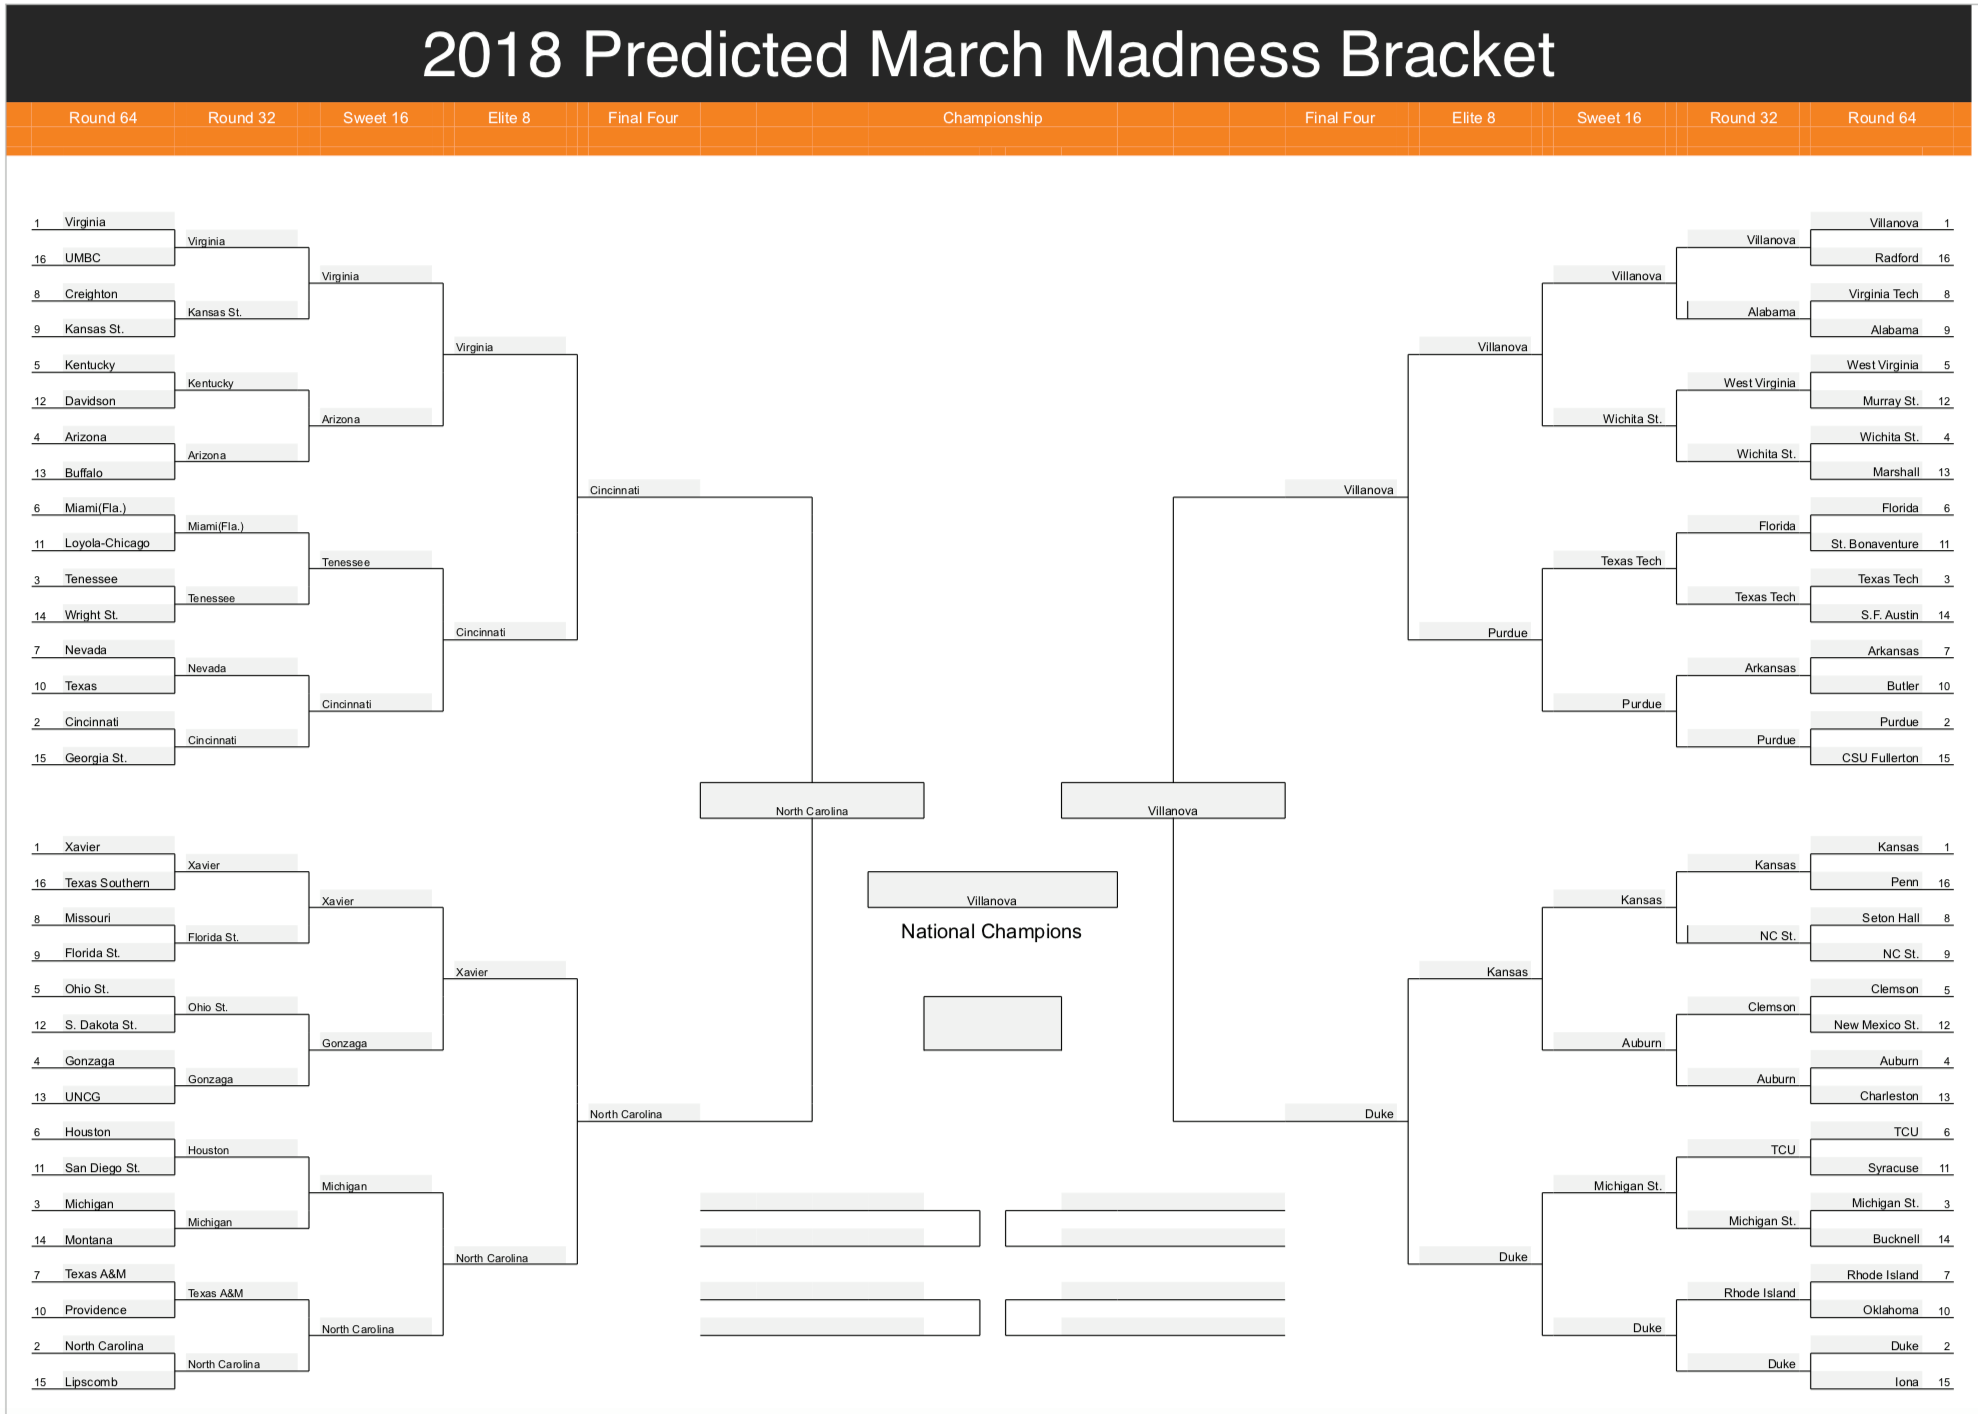

In [25]:
from IPython.display import Image
fig_2018_Predicted= Image(filename=("2018PredictedBracket.png"))
fig_2018_Predicted

This is the visual representation of the 2018 predicted bracket that our simulation has predicted based off of our data we compiled. We take this prediction and compare it to the actual bracket that happen that year.

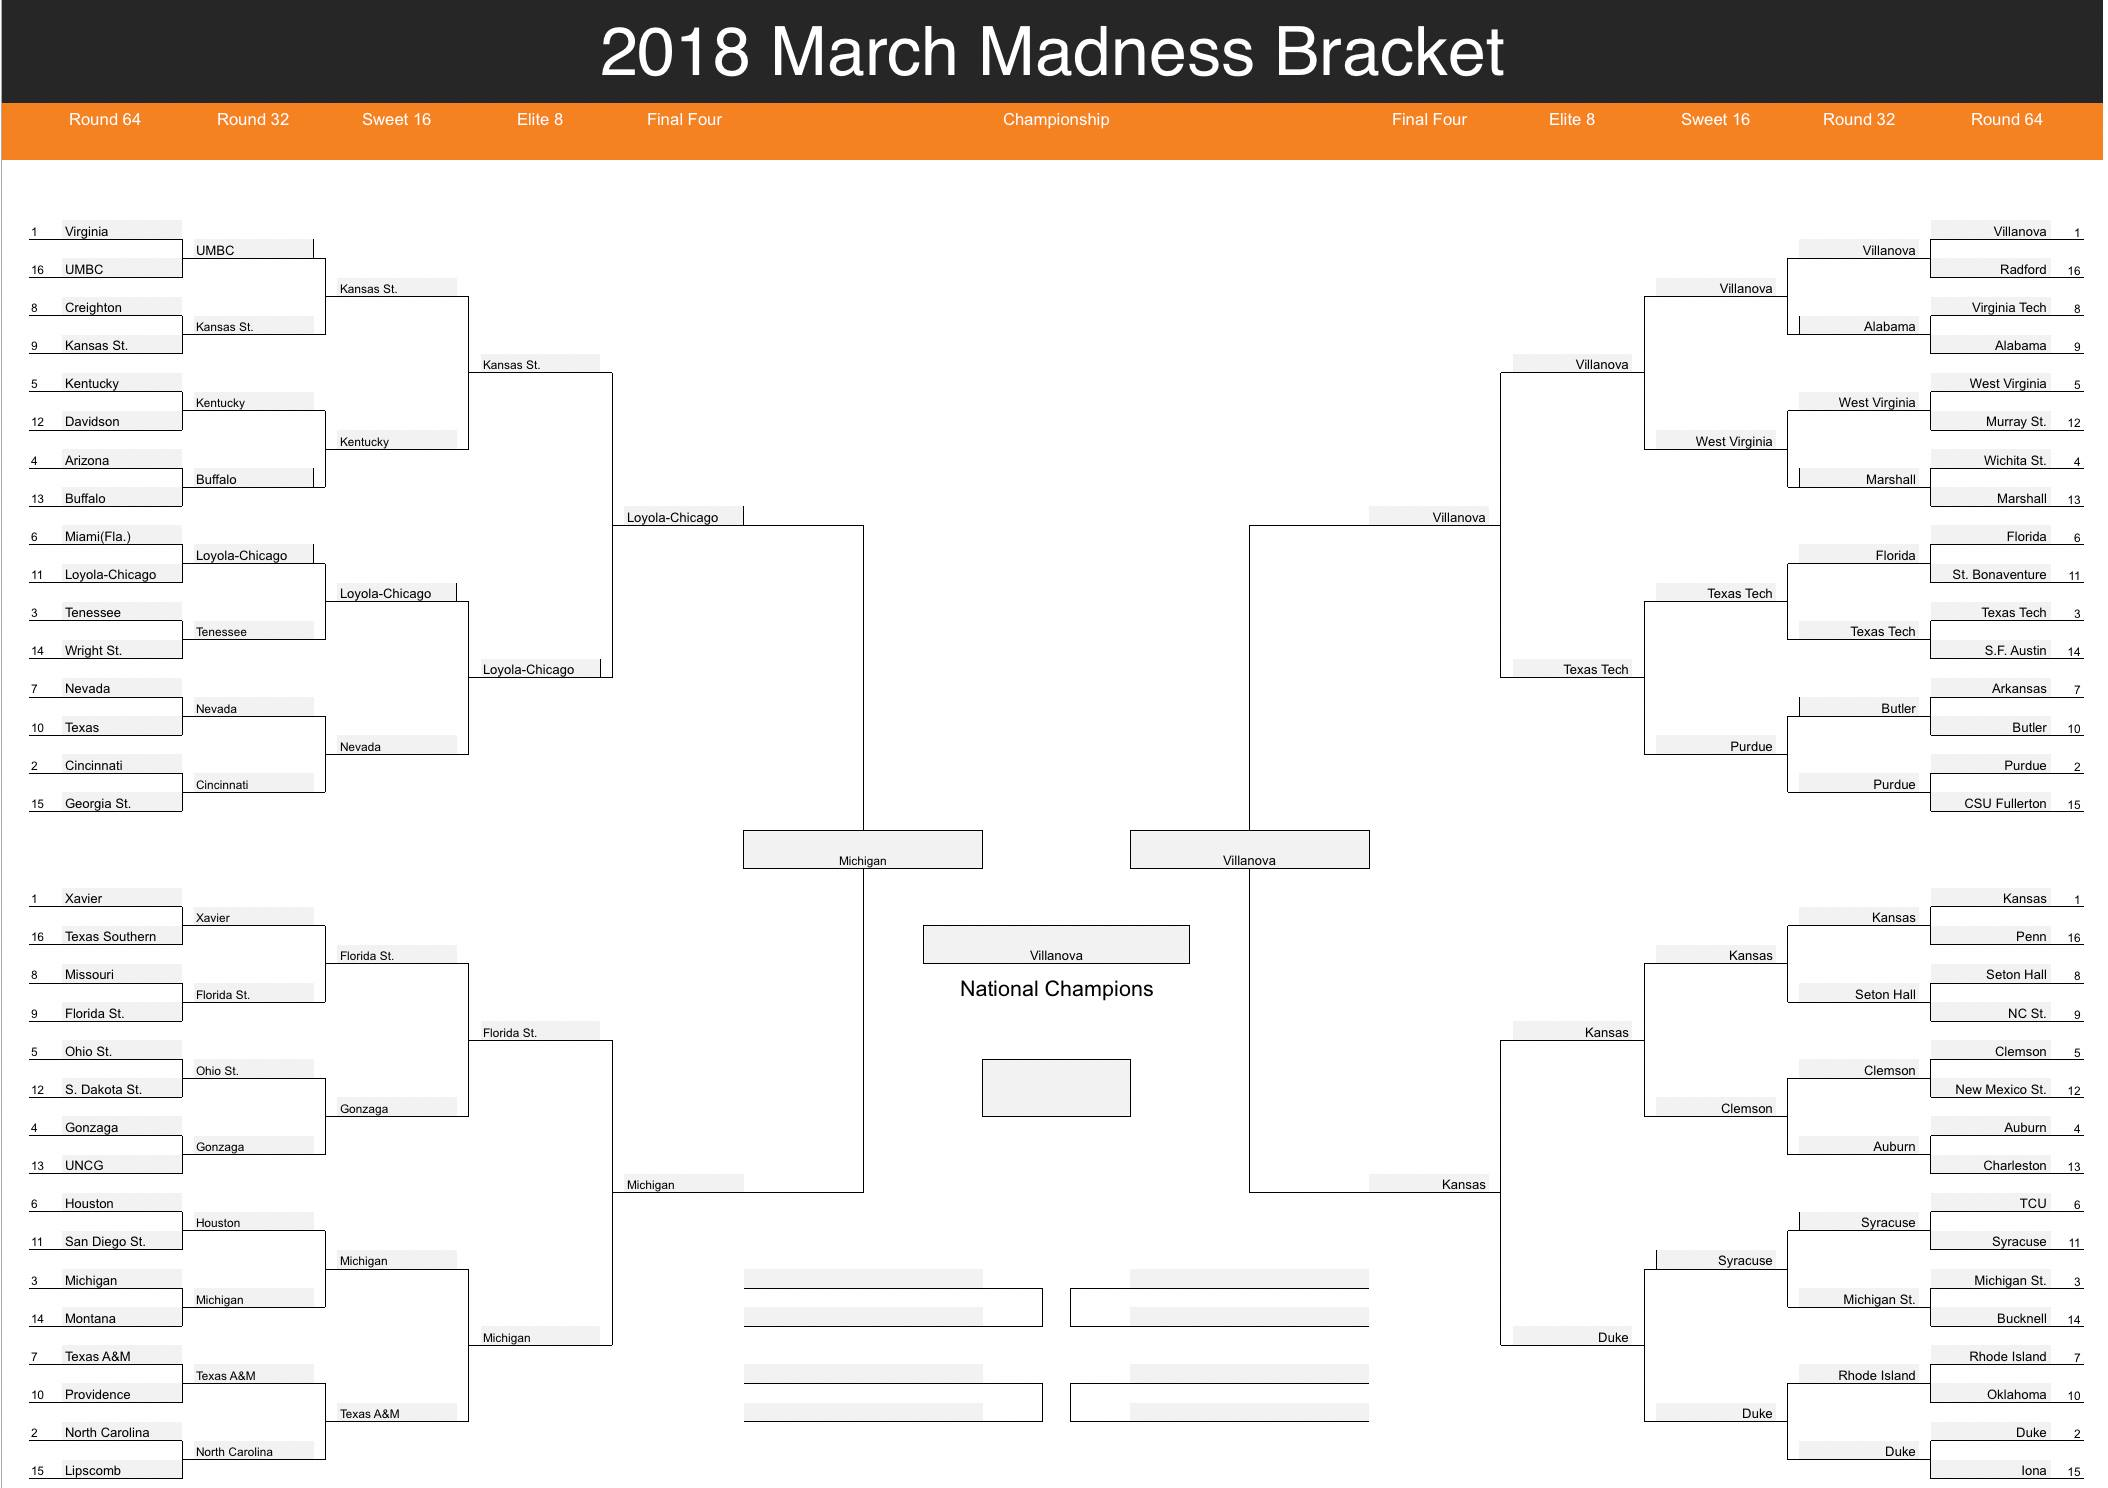

In [30]:
fig_2018_Actual= Image(filename=("2018ActualBracket.jpg"))
fig_2018_Actual

This is a visual representation of the 2018 actual bracket that occured last year and we use this bracket to compare how our simulation has done.

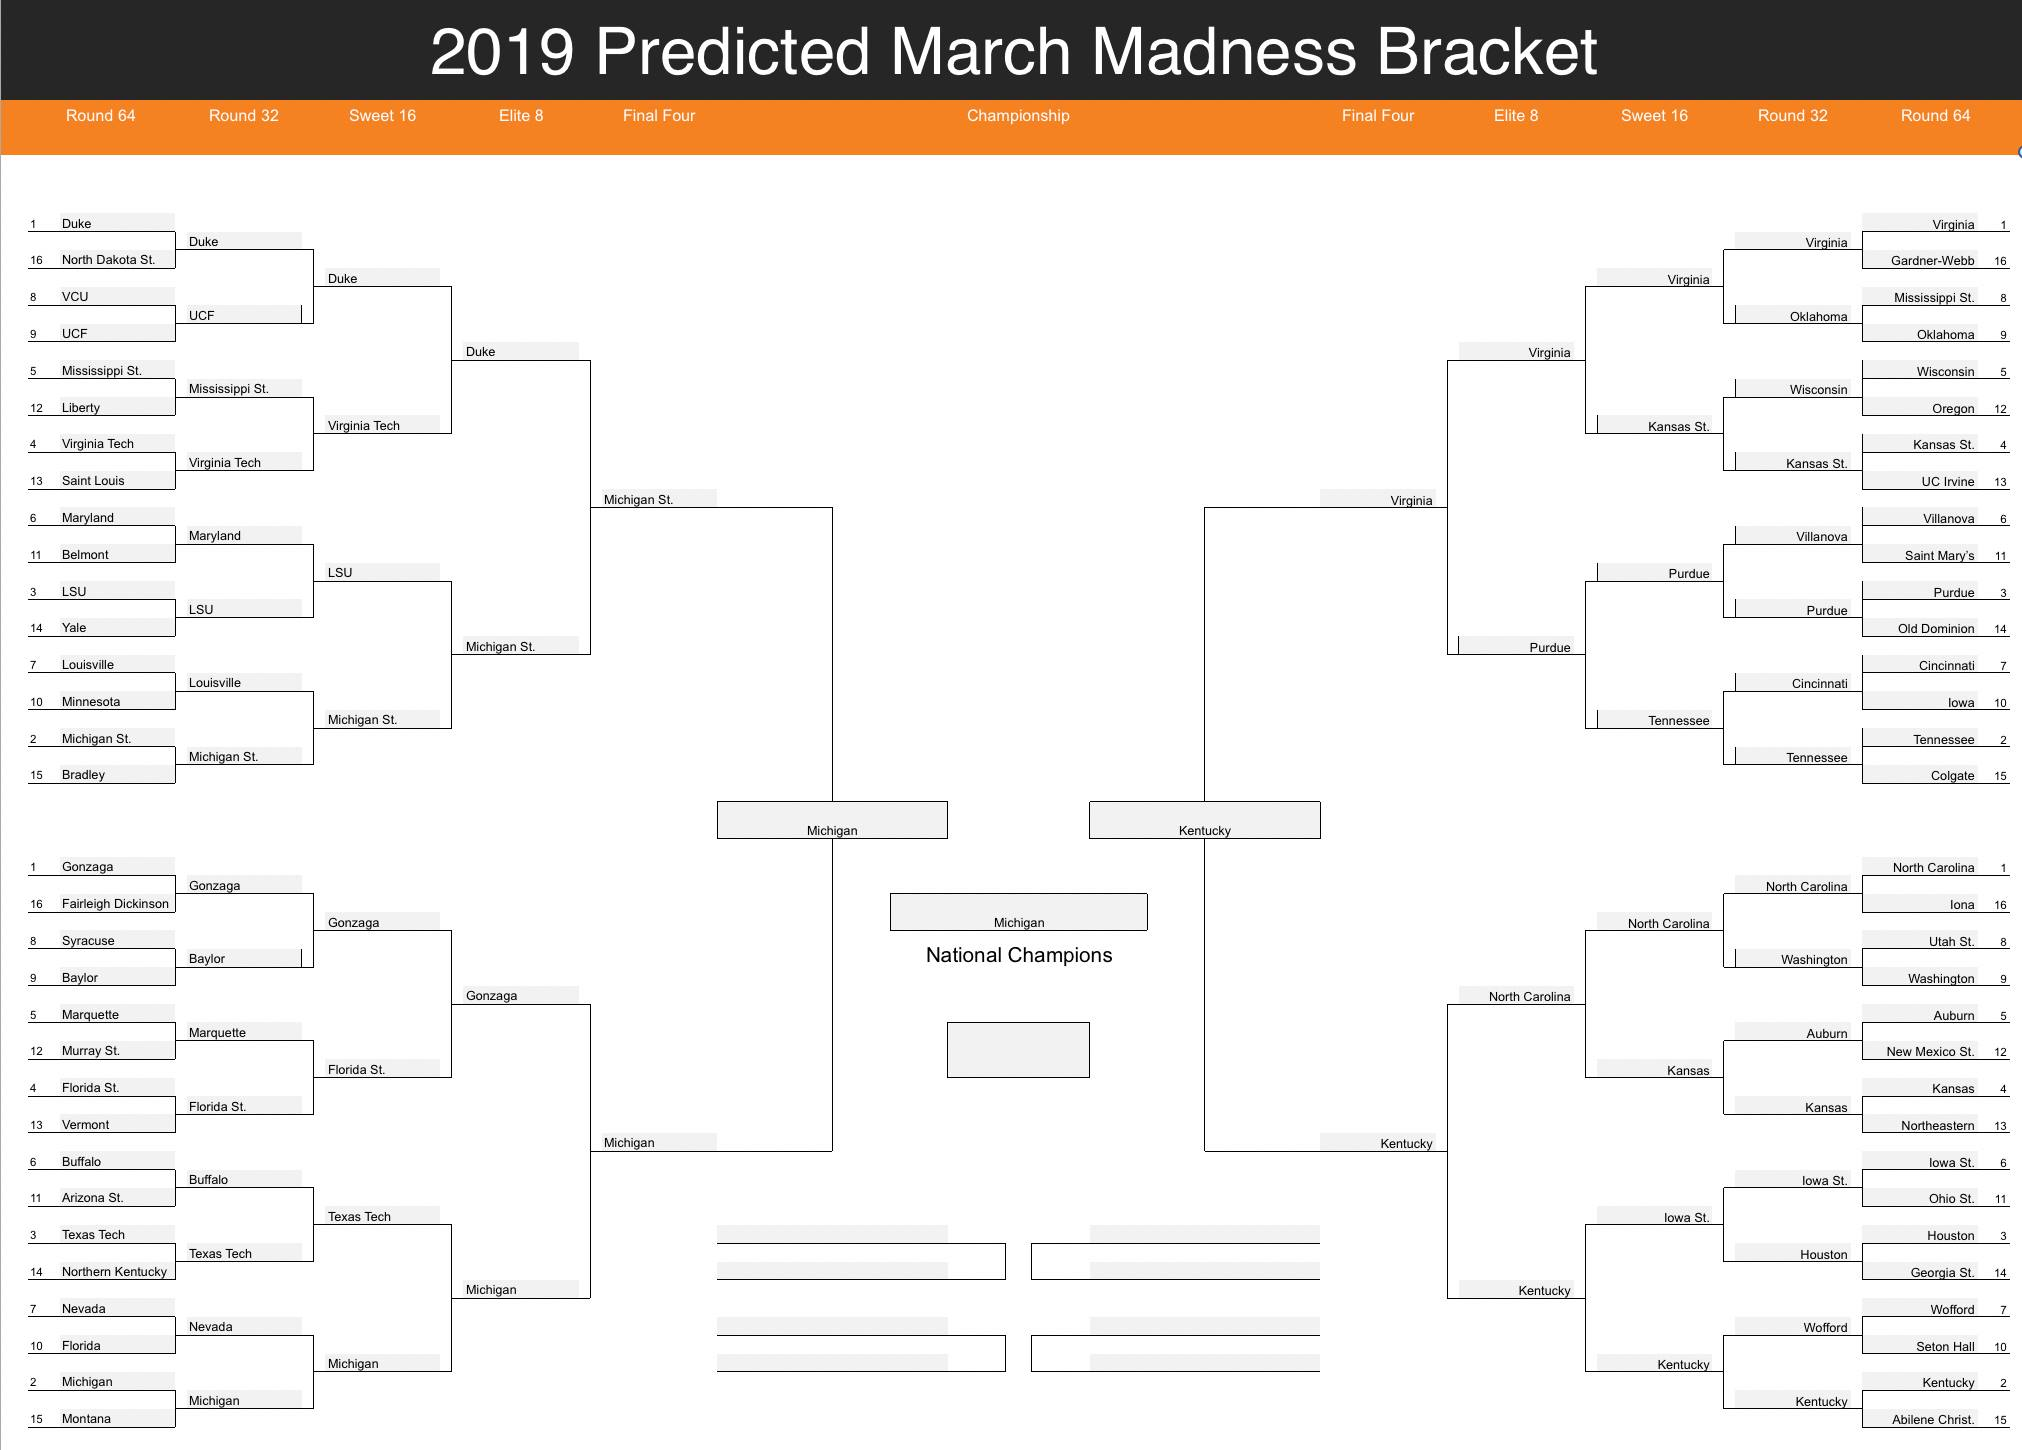

In [28]:
fig_2019_Predicted= Image(filename=("2019PredictedBracket.jpg"))
fig_2019_Predicted

This is the visual representation of the 2019 predicted bracket that our simulation has predicted based off of our data we compiled. We take this prediction and compare it to the actual bracket.

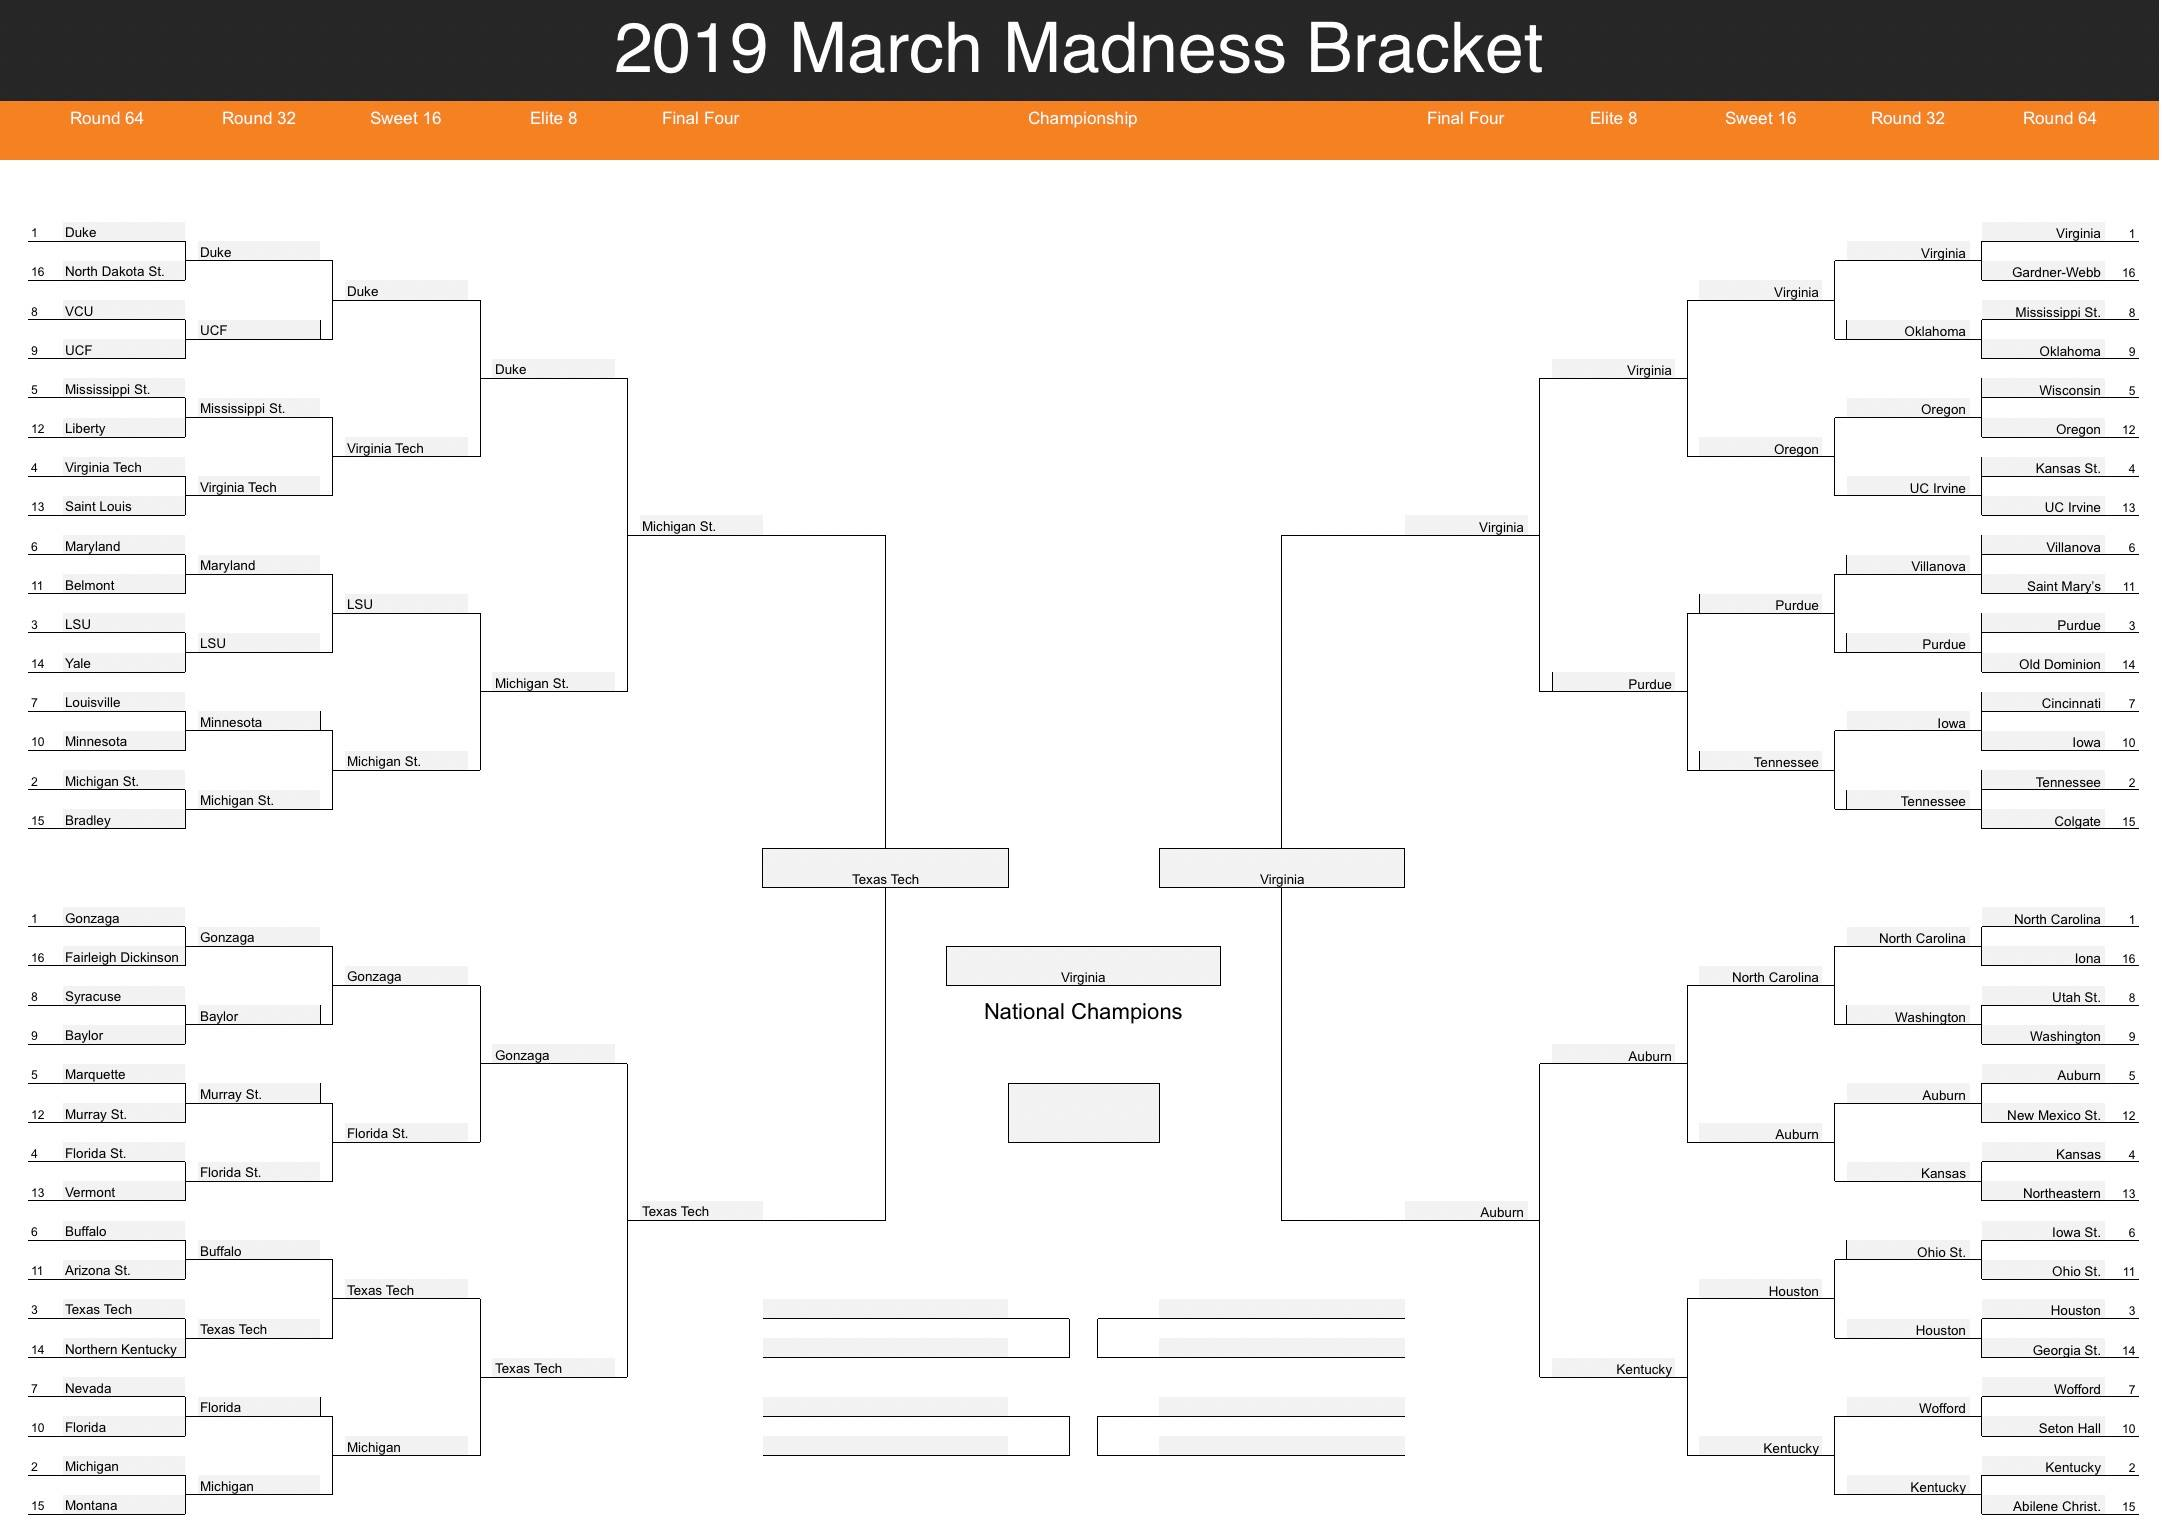

In [29]:
fig_2019_Actual= Image(filename=("2019ActualBracket.jpg"))
fig_2019_Actual

This is the visual representation of the 2019 predicted bracket that our simulation has predicted based off of our data we compiled. We take this prediction and compare it to the actual bracket.

# Ethics and Privacy

Some of the ethical considerations that may exist in our study include potential issues in our dataset, as we are incapable of assuming that every player played their best or hardest, and that they may have lost a game on purpose or not played as well which may cause some of the results in the dataset to be misleading. This also includes potential future simulated tournaments as players may not be able to play due to injury or some other issue that may cause them to lose the game on purpose. 

Additionally, we tried our best to simulate a player, coach, and school’s mindset by displaying the seed history whether it be the general one or the school’s but we are incapable of completely understanding how a player’s mind works and thus incapable of completely predicting a players mindset accurately. We also cannot assume that player mind is completely tied into the seed history and may be potential privacy and ethics issue. 

Finally if our study does prove to be successful to a profitable margin, there may be individuals that could take advantage of it and make money of others, or current betting systems. 


# Conclusions / Discussions

March Madness is a popular event because of how unpredictable it is, in a one-off single elimination game, the numbers indicate to us that it is close to impossible to accurately predict a perfect bracket. Various studies have been conducted that have tried to predict matchups but none of them have been successful. In our study, our goal was to see whether we can find defined variables that would help us more accurately predict the outcomes for March Madness games, and we believe we were able to do so. By focusing the core of our study on past historical games, while also maintaining importance in the present, we were able to find variables we felt were defined and useful in accurately predicting games.

 First using our dataset that displayed the historical outcomes of games in March Madness from the year 1985 - 2016, we were able to create a base rating for each of the schools we deemed important, those that appeared at least 3 times in that timespan. As the data set gave us the outcomes of the games, we were able to identify schools and reward them points depending on how far they went each year of the tournament. We maintained the “relevancy factor” by multiplying each school’s score by .9 everytime we added a year so that the base score would be most impacted by more recent years. This base score allowed for us to measure how great a school would be traditionally and translated into the school’s team strength. 

The historical results dataset also gave us how well each school did as a higher or lower seed. By calculating the win percentage of schools as a higher or lower seed, this was important in simulating both the school’s team strength, and also the psyche of the school, an important and underrated factor of predicted March Madness outcomes. A team and their fan’s may react differently when they are the higher or lower seed, provoking emotions such as motivation and the “underdog mentality” or reservation and caution in hopes of not being upset. These powerful emotions were considered and calculated in our simulator. 

The final variable we considered was the seed history, independent of what team is playing. By scraping through the page, we were able to determine how well a specific seed did against the other 15 and again this was important as it simulate various factors that a school may encounter while playing. Firstly, this gave us a good idea of how strong a school is for that season, for that reason we multiplied this score by 10 in our simulator because the present results matter as much as the past. But again it also measured psyche as teams may not play their usual game if they were aware of a certain upset that always happen, providing a team with more motivation than they may usually play or possibly more caution. 

Combining our 3 variables that incorporate the past results, the current season, as well as taking into consideration player psyches, we developed a simulator that we felt was successful in more accurately prediction matchups. As stated earlier, our score for the 2018 March Madness Bracket was 86th, and using the ESPN March Madness Fantasy Tool, that would have placed us in the 92.8 percentile (http://fantasy.espn.com/tournament-challenge-bracket/2018/en/groupfind). Similarly, for the 2019 March Madness Bracket, our score was a 109, placing us in the 79.4th percentile using the same tool (http://fantasy.espn.com/tournament-challenge-bracket/2019/en/groupfind). The average for 2018 March Madness Bracket predictions told us that most people found themselves in the 57th percentile, significantly lower than our calculated score (https://www.ncaa.com/news/basketball-men/2019-03-08/heres-how-your-march-madness-bracket-will-do-if-you-only-pick-better). 

Due to the percentile of our brackets, we can deem our study to be successful in that we have found defined variables that will help us more accurately predict March Madness Brackets. 
